Entrenando en grid 5x5 con Q-Table 2D...
Episodio 100/1000 completado. Recompensa promedio (últimos 100): 85.5
Episodio 200/1000 completado. Recompensa promedio (últimos 100): 91.1
Episodio 300/1000 completado. Recompensa promedio (últimos 100): 91.3
Episodio 400/1000 completado. Recompensa promedio (últimos 100): 91.3
Episodio 500/1000 completado. Recompensa promedio (últimos 100): 91.2
Episodio 600/1000 completado. Recompensa promedio (últimos 100): 91.3
Episodio 700/1000 completado. Recompensa promedio (últimos 100): 91.1
Episodio 800/1000 completado. Recompensa promedio (últimos 100): 91.0
Episodio 900/1000 completado. Recompensa promedio (últimos 100): 91.1
Episodio 1000/1000 completado. Recompensa promedio (últimos 100): 90.9
Entrenamiento completado.

Tabla Q final (Estados 0-24 vs Acciones 0-3):
[[ 37.1  41.9  37.2  42.6]
 [ 42.5  48.5  37.3  47.1]
 [ -1.1  54.7   7.2   3.3]
 [  1.9  44.4  -0.8  -0.7]
 [ -0.6   6.3  -0.5  -0.6]
 [ 22.3  48.5  16.7  24.5]
 [ 42.1  55.   42.3  54

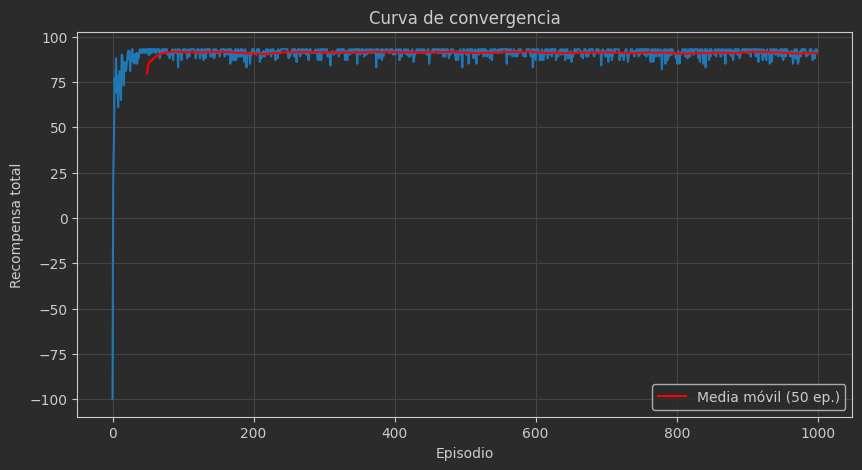


Política aprendida (flechas):
---------------------
| →  | ↓  | ↓  | ↓  | ↓  |
---------------------
| ↓  | ↓  | →  | ↓  | ↓  |
---------------------
| →  | →  | →  | ↓  | ↓  |
---------------------
| →  | →  | →  | →  | ↓  |
---------------------
| ↑  | →  | →  | →  | 🏁 |
---------------------


In [2]:
# -*- coding: utf-8 -*-
"""q_learning_gridworld_5x5_04.ipynb

Automatically generated by Colab.


"""

# =====================================================================
# Q-Learning (algoritmo basico con tabla Q de 2 dimensiones
# muestra ademas una matriz de politicas aprendidas)
#
# =====================================================================
# Materia: Aprendizaje por Refuerzo I
# Carrera: Maestria en Inteligencia Artificial - Universidad de Buenos Aires
# Año: 2025
# Docente: Miguel Augusto Azar
# =====================================================================

'''

Gridworld 5x5 - Q-Table 2 dimensiones
=====================================

Política aprendida (flechas):
 ↓   ↓   ↓   →   ↓
 ↓   ↓   ↓   →   ↓
 →   ↓   ↓   →   ↓
 →   →   ↓   ↓   ↓
 →   →   →   →   🏁

'''

import numpy as np
import random
import matplotlib.pyplot as plt

plt.rcParams.update({
    'figure.facecolor': '#2b2b2b',     # fondo exterior
    'axes.facecolor':   '#2b2b2b',     # fondo del área del gráfico
    'axes.edgecolor':   '#cccccc',     # borde de los ejes
    'axes.labelcolor':  '#cccccc',     # etiquetas de los ejes
    'xtick.color':      '#cccccc',     # color de los números en el eje X
    'ytick.color':      '#cccccc',     # color de los números en el eje Y
    'text.color':       '#cccccc',     # color del título y textos
    'grid.color':       '#444444',     # color de la grilla
})


# --- parametros ---
alpha = 0.1  # tasa de aprendizaje
gamma = 0.9  # factor de descuento
epsilon = 0.2  # factor de exploracion
num_episodios = 1000
max_pasos = 100 # limite de pasos por episodio

# --- configuracion del grid ---
filas, columnas = 5, 5
n_estados = filas * columnas # total de estados (0 a 24)
estado_meta_tupla = (4, 4)   # la meta como tupla (fila, col)
recompensa_meta = 100
recompensa_default = -1
acciones = ['arriba', 'abajo', 'izquierda', 'derecha']
n_acciones = len(acciones)

# ---conversion estado meta a indice ---
estado_meta_idx = estado_meta_tupla[0] * columnas + estado_meta_tupla[1]

# --- inicializ. tabla Q 2D ---
# Q[estado_indice, accion_indice]
Q = np.zeros((n_estados, n_acciones))

recompensas_totales = [] # lista para recompensas por episodio

# --- funcion para mapear entre tupla (fila, col) e indice de estado  ---
def get_state_index(fila, col):
    """Convierte (fila, col) a un índice entero."""
    return fila * columnas + col

def get_fila_col(state_index):
    """Convierte un índice entero a (fila, col)."""
    fila = state_index // columnas
    col = state_index % columnas
    return fila, col

# --- adaptacion funciones para usar índices de estado *** ---

def elegir_accion(estado_idx):
    """Elige una acción usando epsilon-greedy para un estado_idx."""
    if random.uniform(0, 1) < epsilon:
        return random.choice(range(n_acciones)) # accion aleatoria
    else:
        # elige la mejor acción basada en la fila de Q para este estado_idx
        return np.argmax(Q[estado_idx])

def obtener_nuevo_estado(estado_idx, accion_idx):
    """
    Calcula el nuevo estado_idx basado en el estado_idx actual y la accion_idx,
    respetando los límites del grid.
    """
    fila, col = get_fila_col(estado_idx) # fila, col del índice actual

    #la nueva fila, col tentativa
    if accion_idx == 0 and fila > 0:          # arriba
        fila -= 1
    elif accion_idx == 1 and fila < filas - 1: # abajo
        fila += 1
    elif accion_idx == 2 and col > 0:          # izquierda
        col -= 1
    elif accion_idx == 3 and col < columnas - 1: # derecha
        col += 1
    # si la accion llevaría fuera del grid, la fila/col no cambian (el estado no cambia)

    # conversion de la nueva (fila, col) de vuelta a un índice de estado
    nuevo_estado_idx = get_state_index(fila, col)
    return nuevo_estado_idx

# --- entrenamiento (adaptado para usar índices de estado) ---
print(f"Entrenando en grid {filas}x{columnas} con Q-Table 2D...")
for episodio in range(num_episodios):
    # empieza siempre en el estado (0, 0) -> índice 0
    estado_actual_idx = get_state_index(0, 0)
    recompensa_total_episodio = 0

    for paso in range(max_pasos):
        # elegir acción basada en el estado actual (índice)
        accion = elegir_accion(estado_actual_idx)

        # obtencion del siguiente estado (índice) y la recompensa
        estado_siguiente_idx = obtener_nuevo_estado(estado_actual_idx, accion)

        # determinacion de la recompensa
        if estado_siguiente_idx == estado_meta_idx:
            recompensa = recompensa_meta
        else:
            recompensa = recompensa_default

        # --- actualizacion de Q usando indices  ---
        # mejor Q-value esperado para el siguiente estado
        mejor_Q_siguiente = np.max(Q[estado_siguiente_idx])
        # formula de actualiz. Q
        Q[estado_actual_idx, accion] = Q[estado_actual_idx, accion] + alpha * (recompensa + gamma * mejor_Q_siguiente - Q[estado_actual_idx, accion])

        # se mueve al siguiente estado
        estado_actual_idx = estado_siguiente_idx
        recompensa_total_episodio += recompensa

        # terminar episodio si se alcanza la meta
        if estado_actual_idx == estado_meta_idx:
            break

    recompensas_totales.append(recompensa_total_episodio)

    # opcional: imprimir por consola el progreso
    if (episodio + 1) % 100 == 0:
         print(f"Episodio {episodio+1}/{num_episodios} completado. Recompensa promedio (últimos 100): {np.mean(recompensas_totales[-100:]):.1f}")

print("Entrenamiento completado.")

# --- resultados (adaptado para usar la Q-Table 2D) ---

# tabla Q final
print("\nTabla Q final (Estados 0-24 vs Acciones 0-3):")
np.set_printoptions(precision=1, suppress=True)
print(Q)

# mostrar curva de convergencia
plt.figure(figsize=(10, 5))
plt.plot(recompensas_totales)
# media móvil para suavizar la curva
ventana_media = 50
if len(recompensas_totales) >= ventana_media:
    medias_moviles = np.convolve(recompensas_totales, np.ones(ventana_media)/ventana_media, mode='valid')
    plt.plot(np.arange(ventana_media - 1, len(recompensas_totales)), medias_moviles, label=f'Media móvil ({ventana_media} ep.)', color='red')
    plt.legend()

plt.title("Curva de convergencia")
plt.xlabel("Episodio")
plt.ylabel("Recompensa total")
plt.grid(True)
plt.show()

# política aprendida (flechas)
print("\nPolítica aprendida (flechas):")
action_arrows = {0: '↑', 1: '↓', 2: '←', 3: '→'} # mapeo del índice -> flecha
print("-" * (columnas * 4 + 1))
for fila in range(filas):
    print("|", end="")
    for col in range(columnas):
        estado_idx = get_state_index(fila, col) # obtencion del índice del estado actual

        if estado_idx == estado_meta_idx:
            policy_char = " 🏁 " # Meta
        elif np.all(Q[estado_idx] == 0): # Si todos los Q-values son 0 para este estado
             policy_char = " .  " # indica no aprendido o sin preferencia
        else:
            # --- obtencion de la mejor acción desde Q[estado_idx] ---
            mejor_accion_idx = np.argmax(Q[estado_idx])
            policy_char = f" {action_arrows.get(mejor_accion_idx, '?')}  " # Usar .get por seguridad

        print(policy_char + "|", end="")
    print()
    print("-" * (columnas * 4 + 1))